In [3]:
from __future__ import print_function, division   # Python 2/3 compatibility
from skimage import io, img_as_ubyte,measure
from skimage.color import rgb2gray
from skimage.filters import *

import numpy as np                                # array manipulation package
import matplotlib.pylab as plt                 # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 16)         # set default figure size
plt.rcParams['image.cmap'] = 'gray'               # set default colormap to gray

# Assignment 1 : Image Topology and Geometric Transformations

The following programming assignment involves two main tasks, viz. operations involving the pixel neighborhood, and geometric transformations.

**Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding the programming assignments, please do not hesitate to contact the course assistant by sending an e-mail at dip@unioulu.oulu.fi. You can also join in for the Q & A session (schedule is given on the course page in Moodle) for this assignment.

**At first, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):**
* **Contact information:**`

# 1. Image topology using pixel adjacency

This task relies on the concepts of pixel adjacency, connectivity, regions and boundaries. Specifically, we will be working with 4-adjacency and 8-adjacency of a pixel, and extract regions for these two cases. 

**1.1. Read `Image1.png` as a color as well as a grayscale image. Next, convert it to a binary image. Print the size of the Numpy array representing the colored image. Display all the three images in the same figure.**

(407, 359, 3)


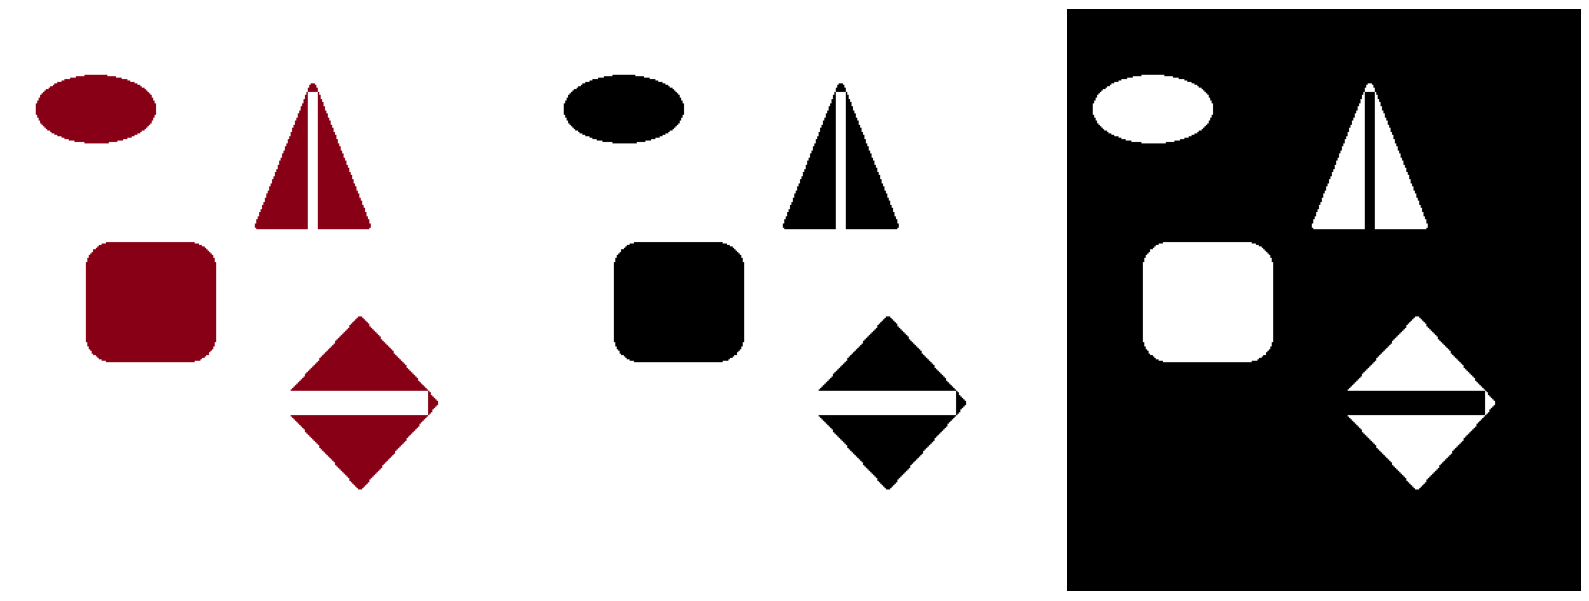

In [6]:
# read the test image and convert it to grayscale as well
colored_image = io.imread('Image1.png')
grayscale_image = io.imread('Image1.png',as_gray=True)
# The pixel values are in the range [0,1] and we want to convert it to [0,255]
grayscale_image = img_as_ubyte(grayscale_image)

# Use thresholding to convert the grayscale image into a binary image.
thresh = threshold_triangle(grayscale_image)
binary_image = grayscale_image < thresh
binary_image = binary_image.astype(np.uint8)

# Print the dimensions of the color image
print(colored_image.shape)

# display all images in the same figure
fig, ax = plt.subplots(figsize=(16,16), nrows=1, ncols=3)
ax[0].imshow(colored_image)
ax[0].axis('off')
ax[1].imshow(grayscale_image)
ax[1].axis('off')
ax[2].imshow(binary_image)
ax[2].axis('off')
fig.tight_layout()

**How is the data stored in the colored image `Image1.png`? Notice that `colored_image` in previous step is a numpy array. How is each pixel of the `Image1.png` image represented in array `colored_image`?**

`407 represents the Height of the colored image(Image1.png) , 359 represents the Width of the colored_image and 3 represents the number of channels which are (Red, Greeen, Blue) `

### Detecting, labelling and coloring connected regions

The image `binary_image` contains four shapes, which are **ROI1 (top left), ROI2 (top right), ROI3 (bottom left), ROI4 (bottom right)**, each shape defining a single connected region. The objective is to give different colors to each of the four regions. 

**Carefully read the following:** 

For each region, the coordinates of one pixel lying on it are given. This is the seed pixel. Thus, you have `P1, P2, P3, P4` as the coordinates of the seed pixels lying on `ROI1, ROI2, ROI3, ROI4` respectively. You need to use the function [skimage.measure.label()](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) to first label all pixels in the image. Each pixel is given a unique label, based on which connected region it belongs to. 
    
Thus, the pixels belonging to the same region will have the same label. After that, you need to find the label of the given seed pixel (`P1, P2, P3, P4`) and find other pixels in the image with the same label. Having obtained the four regions, use the `colored_image` to give colors to all the four regions. For your reference, you can refer to the image `expected_image.png` provided along the assignment data. Basically you should have been able to give different colors to each of the four regions.

Hint: Remember that each pixel at (i,j) location in `colored_image` has the rgb color defined by the 1x3 numpy array `colored_image[i,j,:]`. 
E.g. if you want to give red color to pixel at (i,j), you need to execute the following command :

`colored_image[i,j,:] = np.array([[255,0,0]])`

**1.2. Now you need to use pixel adjacency and connectivity to detect and color each of the four regions in four different colors.**

Label of P1:  1
Label of P2:  2
Label of P3:  3
Label of P4:  4
Region P1 contains 3176 pixels.
Region P2 contains 3746 pixels.
Region P3 contains 7347 pixels.
Region P4 contains 5193 pixels.


(np.float64(-0.5), np.float64(358.5), np.float64(406.5), np.float64(-0.5))

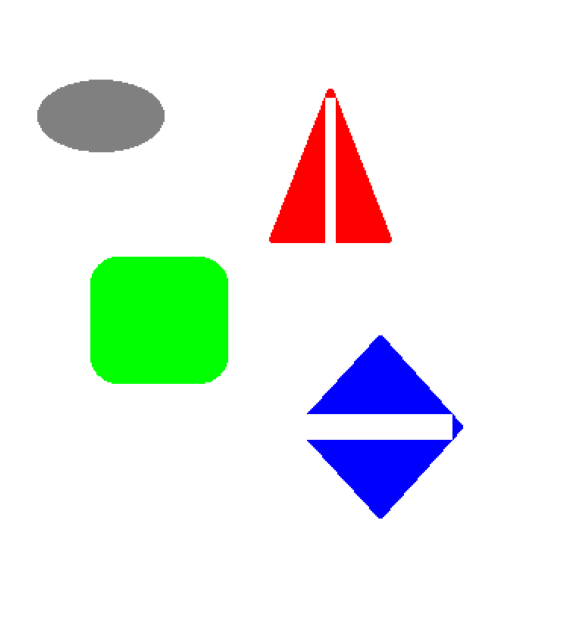

In [ ]:
# You are given the coordinates of four seed pixels. Each seed pixel lies in exactly one connected region.
P1 = np.array([[57],[32]])
P2 = np.array([[55],[211]])
P3 = np.array([[180],[80]])
P4 = np.array([[258],[213]])

"""
 Label all the connected components in the image. 
 Pay attention to the last parameters `connectivity` in the following function. It can be set to 1 or 2. 
     connectivity = 1 implies it uses 4-adjacency
     connectivity = 2 implies it uses 8-adjacency
 Therefore use the correct connectivity setting such that you get 4 connected regions. 
"""
labeled_image, num = measure.label(binary_image, background=False, return_num=True, connectivity=2) 

# 1.2.1 Find the labels of all the seed pixels
label_P1= labeled_image[P1[0],P1[1]].item()
print("Label of P1: ",label_P1)
label_P2= labeled_image[P2[0],P2[1]].item()
print("Label of P2: ",label_P2)
label_P3= labeled_image[P3[0],P3[1]].item()
print("Label of P3: ",label_P3)
label_P4= labeled_image[P4[0],P4[1]].item()
print("Label of P4: ",label_P4)

# 1.2.2 Find the pixels belonging to each of the four labels. These will be the desired regions. There should only be four regions
region_P1 = np.argwhere(labeled_image == label_P1)  # Pixels in ROI1
region_P2 = np.argwhere(labeled_image == label_P2)  # Pixels in ROI2
region_P3 = np.argwhere(labeled_image == label_P3)  # Pixels in ROI3
region_P4 = np.argwhere(labeled_image == label_P4)  # Pixels in ROI4

print(f"Region P1 contains {len(region_P1)} pixels.")
print(f"Region P2 contains {len(region_P2)} pixels.")
print(f"Region P3 contains {len(region_P3)} pixels.")
print(f"Region P4 contains {len(region_P4)} pixels.")

# 1.2.3 Set distinct colors for each of the four regions. You are free to choose colors for the four regions. 
colored_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)

# Define colors for each region
colors = {
    label_P1: [128, 128, 128],  # Grey for ROI1
    label_P2: [255, 0, 0],      # Red for ROI2
    label_P3: [0, 255, 0],      # Green for ROI3
    label_P4: [0, 0, 255]       # Blue for ROI4
}
# Assign colors to the regions
for label, color in colors.items():
    colored_image[labeled_image == label] = color

# Set the background color to white ([255, 255, 255]) to match it with the expected image
colored_image[labeled_image == 0] = [255, 255, 255]  # Background has label 0


# Display the colored image
fig, ax = plt.subplots(figsize=(8,8), nrows=1, ncols=1)
ax.imshow(colored_image)
ax.axis('off')


**Which of the two parameter values, i.e. connectivity=1 or connectivity=2, led to exactly 4 differently colored regions? Why is it so?**

`The parameter value connectivity=2 led to exactly 4 differently colored regions.`

### Finding 4-adjacent and 8-adjacent pixels

Continue with the binary version of `Image1.png`, i.e. the `binary_image`. Read the definition of 4-adjacency and 8-adjcency from the lecture notes. 

**1.3. Implement python functions to compute the 4-adjacent and 8-adjacent pixels of a given pixel in the input binary image. The skeleton of the functions is already provided below. You need to write the logic to obtain the 4-adjacent and 8-adjacent pixels for the given binary image. Note that the set of intensity values is `{1}`. The input to the function will be a Numpy array of dimensions 2x1 and the binary image. The output for both the functions will be the list of 4-adjacent or 8-adjacent pixels. Each pixel will be represented as a Numpy array of 2x1 dimensions**

In [50]:
def find_4_adj_px(P, im):
    """
    P :  2x1 Numpy array of the pixel
    im : Binary image
    """
    # The set of intensity values
    V = {1}
    
    adj_px = [P]
    # Your logic
      # Extract the coordinates of the pixel
    i, j = P[0, 0], P[1, 0]
    # Dimensions of the image
    rows, cols = im.shape
    # Define the 4-adjacent neighbors: up, down, left, right
    neighbors = [
        (i - 1, j),  # Up
        (i + 1, j),  # Down
        (i, j - 1),  # Left
        (i, j + 1)   # Right
    ]
    
    # Check each neighbor
    for ni, nj in neighbors:
        # Ensure the neighbor is within bounds
        if 0 <= ni < rows and 0 <= nj < cols:
            # Check if the neighbor has intensity value 1
            if im[ni, nj] in V:
                adj_px.append(np.array([[ni], [nj]]))
    
    # Remove the seed pixel from the list
    adj_px.remove(P)
    
    # return the list of adjacent pixels
    return adj_px
    
def find_8_adj_px(P, im):
    """
    P : 2x1 Numpy array of the pixel
    im : Binary image
    """
    # The set of intensity values
    V = {1}
    
    adj_px = [P]
    # Your logic
    # Extract the coordinates of the pixel
    i, j = P[0, 0], P[1, 0]
    # Dimensions of the image
    rows, cols = im.shape

    # Define the 8-adjacent neighbors: up, down, left, right, and diagonals
    neighbors = [
        (i - 1, j),     # Up
        (i + 1, j),     # Down
        (i, j - 1),     # Left
        (i, j + 1),     # Right
        (i - 1, j - 1), # Top-left diagonal
        (i - 1, j + 1), # Top-right diagonal
        (i + 1, j - 1), # Bottom-left diagonal
        (i + 1, j + 1)  # Bottom-right diagonal
    ]
    
    # Check each neighbor
    for ni, nj in neighbors:
        # Ensure the neighbor is within bounds
        if 0 <= ni < rows and 0 <= nj < cols:
            # Check if the neighbor has intensity value 1
            if im[ni, nj] in V:
                adj_px.append(np.array([[ni], [nj]]))
    
    # Remove the seed pixel from the list
    adj_px.remove(P)
    
    # return the list of adjacent pixels
    return adj_px
    

**1.4. Next, use the methods implemented above, to check if two given pixels are 4-adjacent and/or 8-adjacent in the input binary image `binary_image`. Print True or False as output.**

In [51]:
# The two pixels are the following:
P1 = np.array([[58], [207]])
P2 = np.array([[57], [208]])

# Use the above implemented methods to find 4-adjacent and 8-adjacent pixels
adj_pxs = find_4_adj_px(P1, binary_image)

# Check if P2 pixel lies in adj_pxs
print(np.any(np.all(P2 == adj_pxs, axis=2)))

adj_pxs = find_8_adj_px(P1, binary_image)

# Check if P2 pixel lies in adj_pxs
print(np.any(np.all(P2 == adj_pxs, axis=2)))

False
True


# 2. Geometric transformations
This task involves spatial transformation of the pixels, according to a given transfer mapping.

We will being with a study of the curvillinear transformation of an image, which is illustrated by the following step-by-step process. Note that the image transformation is performed by the function `warp2d` contained in the file *custom_warp.py*, which is located in the same folder of this notebook. It is thus important to understand the meaning of the arguments required by that function.

First, we load and display the image `cameraman.tif` on the screen. The image size is $256\times256$ pixels, and usually one assumes a coordinate system where the origin is at the top-corner and the horizontal and vertical coordinates lie within the range $[0,width-1]$ and $[0,height-1]$. However, when dealing with geometric transformations, it is often more convenient to define a new coordinate system such that the image lies in the domain $U\times V = [-1,1]\times[-1,1]$. This will have the effect of: _a)_ setting the origin of the coordinate system at the center of the image, _b)_ making the geometric transformation independent from the image size.

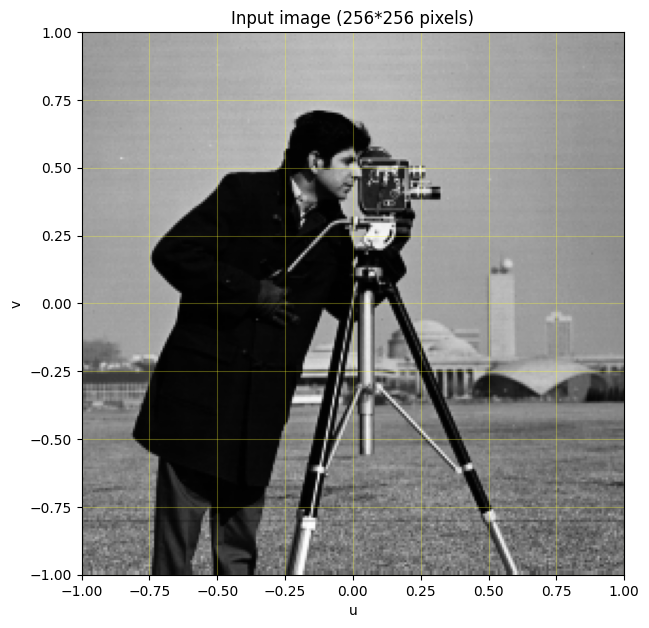

In [33]:
# Define the domain intervals for horizontal and vertical coordinates (they are parameters required by the function `warp2d`)
ubound, vbound = [-1,1], [-1,1]

# Load and visualize the image
input_image = io.imread("cameraman.tif")
plt.imshow(input_image, extent=np.ravel([ubound,vbound]))
plt.xlabel('u')
plt.ylabel('v')
plt.grid(color=[1,1,0.2], alpha=0.3)
plt.title(f"Input image ({input_image.shape[1]}*{input_image.shape[0]} pixels)" )
plt.show()

Now suppose that one wants the above image to be transformed according to the _forward transformation_ $\tau:U \times V \longrightarrow X \times Y$ defined as follows:

$\tau:\left\{\begin{matrix}
x(u,v) & = & u\\ 
y(u,v) & = & v + u^2
\end{matrix}\right.$

The procedure to achieve this is to consider a 2D-array of arbitrary size `output_shape` that will accomodate the pixels of the output image, and for each pixel location $(x,y)$ in it, find its corresponding location in the input image by the _inverse transformation_ $\tau^{-1}(x,y)$, and finally assign to $(x,y)$ (in the output image) the intensity of the pixel at $\tau^{-1}(x,y)$ (in the input image). In practice, all this is done internally by `warp2d`, however we must provide the inverse function $\tau^{-1}$. 

In this specific example the _inverse function_ $\tau^{-1}:X \times Y \longrightarrow U \times V$ is easiy obtained by elementary algebra:

$\tau^{-1}:\left\{\begin{matrix}
u(x,y) & = & x\\ 
v(x,y) & = & y - x^2
\end{matrix}\right.$

We can now define the inverse transformation $\tau^{-1}$ in Python code :

In [34]:
# The inverse function must take as its argument a numpy array of size Nx2, in which each row represents the [x,y] coordinates
# of one of the N points, and it must return an array of the same size containing the transformed [u,v] coordinates
# for each point.

def inverse_map(xy):
    return np.hstack([xy[:,0:1], xy[:,1:2]-xy[:,0:1]**2])

At this point, we must define suitable values for the size of the output image, and for the bounds of its domain intervals $X$ and $Y$. In principle, all the aforementioned values can be assigned arbitrarily, however the bounds of $X$ and $Y$ are typically chosen in such a way that the whole transformed image is visible, and does not appear cropped. This can be done in several ways. Three possibilities are:

_1)_ Manually, by trial and error

_2)_ Manually, by using the forward transformation $\tau$ in order to determine the lower and upper bounds of $x(u,v)$ and $y(u,v)$, when $-1\leq u,v \leq 1$

_3)_ Automatically, by performing in Pyhton code the calculation in point _2)_.

In this example, we choose option _2)_ and we notice that since $x(u,v)=u$ the lower/upper bounds are clearly $[-1,1]$. For $y(u,v)$ it is easy to verify that the lower/upper bounds are reached respectively when $(u,v)=(0,-1)$ and $(u,v)=(1,1)$, and they are $[-1,2]$.

In [35]:
# Set the bounds for the domain of the output image, as explained above:
xbound, ybound = [-1,1], [-1,2]


We are now ready to invoke the warp function `warp2d` to obtain the transformed output image. Note that the function `warp2d` is essentially a wrapper function of [`skimage.transform.warp`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.warp) that accepts domain intervals as its arguments.
The syntax for `warp2d` is the following :
___
*`warp2d`(input_image, inverse_map, ubound=[-1,1], vbound=[-1,1], xbound=[-1,1], ybound=[-1,1], output_shape=None, **kwargs)*

__Returns:__ numpy array of size *output_shape* containing the transformed image.

__Note:__ The keyword arguments contained in _\*\*kwargs_ are the same keyword arguments accepted by [`skimage.transform.warp`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.warp). Please, check the documentation for a complete explanation of the parameters. Some of them are useful to specify, for instance, the _padding_ and the _interpolation_ method to be used.
___

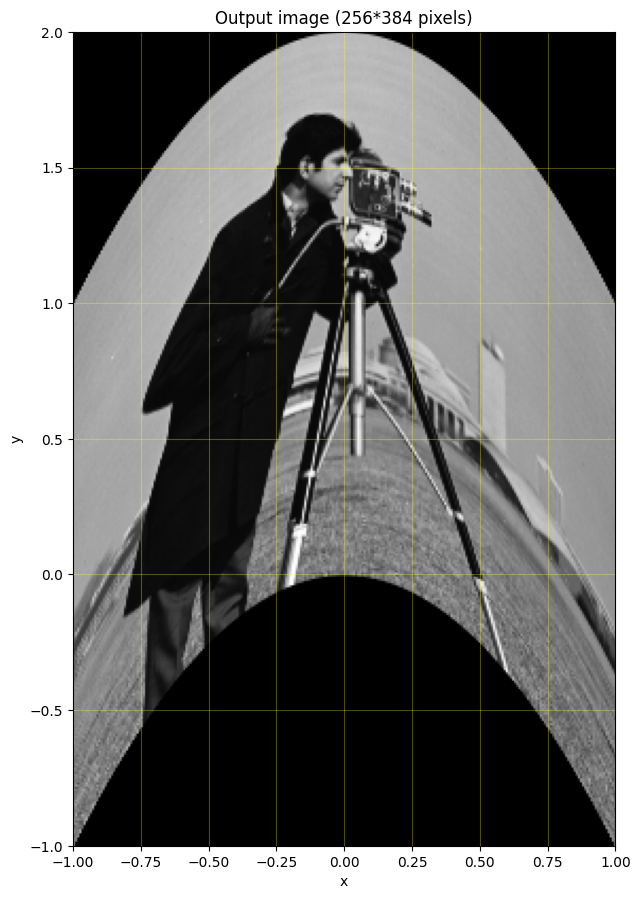

In [36]:
# Set the size of the output image:
output_shape = [256+128,256]

# Invoke the warp function to perform the transformation (see the above instructions for a detailed explanation of the arguments):
from custom_warp import warp2d
output_image = warp2d(input_image, inverse_map, ubound=ubound, vbound=vbound, xbound=xbound, ybound=ybound, output_shape=output_shape)

# Visualize the result:
plt.imshow(output_image, extent=np.ravel([xbound,ybound]) )
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color=[1,1,0.2], alpha=0.3)
plt.title(f"Output image ({output_image.shape[1]}*{output_image.shape[0]} pixels)" )
plt.show()

# Application of Polar-to-Cartesian curvilinear transformation

Suppose that a sonar mounted on a ship scans the sea floor by sending acoustic impulses at different angles, and recording the intensity of the returned sound. The directions of the sound impulses are such that the sonar is practically sampling the reflectivity of the sea floor on a polar grid. The samples are then stored into a matrix in which the horizontal axis *u* represents the radial coordinate, and the vertical axis *v* represents the angular coordinate. An example of such an image is found in the file `sonar.png` contained in the folder of this notebook.

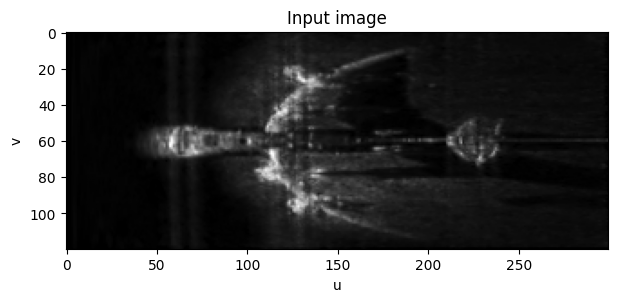

In [37]:
sonar_input = io.imread('sonar.png')

plt.imshow(sonar_input)
plt.xlabel('u')
plt.ylabel('v')
plt.title(f"Input image" )
plt.show()

The above image actually represents an aircraft relic lying on the sea floor, and its appearance looks distorted, especially on the wings. The distortion is caused by the fact that the pixel intensities were originally sampled on a polar grid, but we are now visualizing the image as if its pixels were sampled on a regular Cartesian grid.
The main goal will be that of eliminating this distortion by completing the following tasks.

**2.1 Suppose the sonar collected samples on a polar grid at radial coordinates ranging from $0$ to $5$ and angular coordinates ranging from $-60$ to $+60$ degrees. Define two variables containing the respective lower and upper bounds for the coordinates $u$ and $v$ (like _ubound_ and _vbound_ in the previous example), and use them to visualize the image in the new coordinate system (hint: use the _extent_ argument of _imshow_ as in the example in Section 1).**

**_Note:_ since numpy trigonometric functions work with radians, it is convenient to express angular coordinates in radians.**

Recall that the formulas for transforming polar coordinates to Cartesian coordinates are:

$\tau: \left\{\begin{matrix}
x(u,v) & = & u\, \cos(v)\\ 
y(u,v) & = & u\, \sin(v)
\end{matrix}\right.$

Conversely, the Cartesian-to-polar map is given by:

$\tau^{-1}:\left\{\begin{matrix}
u(x,y) & = & \sqrt{x^2+y^2}\\ 
v(x,y) & = & \mathrm{arctan2}\left (y,x \right )
\end{matrix}\right.$

Note that the image _sonar.png_ is defined in the domain $U\times V$. Hence, following the same reasoning as in the example in the previous Section in this assignment, we seek to obtain an output image defined on a Cartesian domain $X \times Y$, whose pixel intensities at $(x,y)$ are given by the pixel intensities of `sonar_input` at locations $\tau^{-1}(x,y)$.  

**2.2 Define a Python function that evaluates $\tau^{-1}$. In other words, you have to define a function that takes a $N\times 2$ numpy array of coordinates \[x,y\] and returns an array of the same size containing the corresponging coordinates \[u,v\].**

**2.3 Define suitable lower bounds and upper bounds for the $x$ and $y$ coordinates in the output image, and store them respectively in two variables (like _xbound_ and _ybound_ in the previous example). Please, describe very briefly the method you used to obtain the intervals.**

**2.4 Choose a suitable size for the output image, and invoke `warp2d` to obtain the transformed output image. Visualize the result by plotting the image. The aircraft should be completely visible and its wings should appear straight. It should be similar to the corrected image attached along this assignment, titled, `sonar_undistorted.png`.**

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`There were two main tasks for asg, each member took 1 part. Both parts took around 3 hours individually so total it took 6-7 hrs in total to complete the asg`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`Your answer`

# References
`https://www.geeksforgeeks.org/rgb-color-model-in-python/ https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA1_[student number(s)].ipynb`** (e.g. `DIP_PA1_1234567.ipynb` if solo work or `DIP_PA1_2315255-2407704.ipynb` if working in a pair)